
# Lesson: Overfitting and Underfitting
----
Created for AI4ALL UW 2020




## Evaluation metrics


Suppose you have built a classifier on thousands of images on Instagram that will determine if a given photo has been photoshopped. You test your classifier on a small portion of your dataset and you observe the following results:

| Actual | Predicted |
|------------|-----------------|
| Photoshopped | Not Photoshopped |
| Not Photoshopped | Photoshopped |
| Not Photoshopped | Not Photoshopped |
| Photoshopped | Photoshopped |
| Photoshopped | Not Photoshopped |
| Not Photoshopped | Not Photoshopped |
| Photoshopped | Not Photoshopped |
| Not Photoshopped | Not Photoshopped |
| Not Photoshopped | Not Photoshopped |
| Photoshopped | Not Photoshopped |


> a. Build a confusion matrix for the above set of predictions.

Solution.

> b. What is the accuracy of this classifier? What are the precision, recall, specificity, and F1 score?

Solution.

> c. Based on these results, would you say that this is a good classifier? If yes, explain why. If not, one reason why could be bias in the training dataset. What sort of bias might exist in this dataset?

Solution.

## Activity

Over the course of this activity you will demo overfitting and underfitting curves with polynomial regression.

You will fit polynomials of varying degrees to a dataset and analyse how they fit.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [ ]:
# A function that will be used to generate sample data
def sample_func(x, err=0.5):
    return np.random.normal(10 - 1. / (x + 0.1), err)

In [ ]:
# Generates graph for the (x, y) coordinates generated from sample_func and
# fits a polynomial of given degree to the samples. 
#   x       -   array of x values
#   y       -   y values generated from sample_func using x values
#   degree  -   degree of polynomial to fit
def generate_graph_func1(x, y, degree):
    fig = plt.figure(degree)
    fig.clf()
    ax = fig.add_subplot(111, xticks=[], yticks=[])
    ax.scatter(x, y, marker="x", c = "k")
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x[:, np.newaxis], y)
    x_test = np.linspace(-0.2, 1.2, 1000)
    ax.plot(x_test, model.predict(x_test[:, np.newaxis]), '-b')
    ax.set_xlim(-0.2, 1.2)
    ax.set_ylim(0, 12)  
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title("d = " + str(degree))

In [ ]:
# Code to generate samples from sample_func
n_samples = 8
np.random.seed(0)
x = 10 ** np.linspace(-2, 0, n_samples)
y = sample_func(x)

## Demo

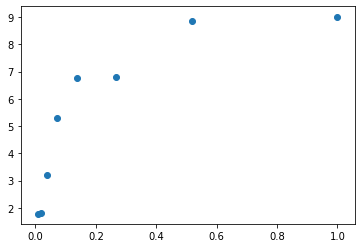

In [ ]:
# Scatter plot of the sample data
plt.scatter(x, y)

### Underfit:

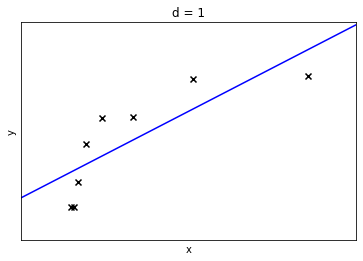

In [ ]:
generate_graph_func1(x, y, 1)

### Overfit:

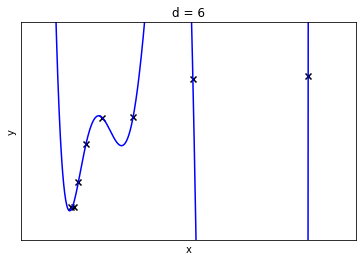

In [ ]:
generate_graph_func1(x, y, 6)

### About the right fit:

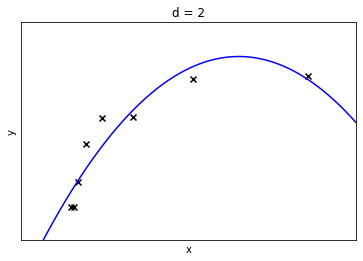

In [ ]:
generate_graph_func1(x, y, 2)

In [ ]:
# A mystery function that will be used to generate sample data for the exercise
def question_func(X):
    return np.cos(1.5 * np.pi * X)

In [ ]:
# Generates graph for the (x, y) coordinates generated from question_func and
# fits a polynomial of given degree to the samples. 
#   x       -   array of x values
#   y       -   y values generated from question_func using x values
#   degree  -   degree of polynomial to fit
def generate_graph_func2(x, y, degree):
    fig = plt.figure(degree)
    fig.clf()
    ax = fig.add_subplot(111, xticks=[], yticks=[])
    ax.scatter(x, y, marker="x", c = "k")
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x[:, np.newaxis], y)
    x_test = np.linspace(0, 1, 100)
    ax.plot(x_test, model.predict(x_test[:, np.newaxis]), '-b')
    ax.set_xlim(0,1)
    ax.set_ylim(-2,2)   
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title("d = " + str(degree))

In [ ]:
# Code to generate sample data from question_func
n_samples = 30
x = np.sort(np.random.rand(n_samples))
y = question_func(x) + np.random.randn(n_samples) * 0.1

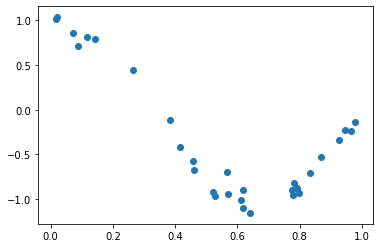

In [ ]:
# Scatter plot of the sample data
plt.scatter(x, y)

#### Try to use generate_graph_func2 with varying degrees and identify polynomials that underfit, overfit, and approximately correctly model the above sample data (like done in the demo with generate_graph_func1)

### Underfit:

### Approximately the right fit:


### Overfit:

### Now, can you tell us how you would quantify this fit? How would you use a metric to figure out how good one is against another?

In [ ]:
### try coding this idea

### Extra credit: another fun example. 
### try coding this mystery function:
(sqrt(cos(x))cos(999999999999999999999999999999999999999999999999999 x)+sqrt(abs(x))-0.7)(4-x*x)^0.01, sqrt(9-x^2), -sqrt(9-x^2) 
(where x is only defined between -4.5 to 4.5 )
### then try to find the best polynomial fit for this.